date: 26-10-2020

# Analysis of Barabasi-Albert Plot using igraph library
Goal: Investigate the relationship between inverse closeness and degree

In [1]:
import igraph
import numpy as np

## Comparison between barabasi graphs with different m values

## Generation
Generate n number of Barabasi graphs with N nodes and different m values

In [2]:
N = 5_000
m_list = range(1,10)
g_list = list(map(lambda m: igraph.Graph.Barabasi(N, m), m_list))

Get np arrays of the degree and closeness

In [3]:
d_array = np.array(list(map(lambda g: g.degree(), g_list)))
c_array = np.array(list(map(lambda g: g.closeness(), g_list)))

#error cheking:
if len(d_array[0]) != len(c_array[0]): raise Exception("Icompatible sizes")

In [4]:
d_array_processed = np.log(d_array)
c_array_processed = 1.0 / c_array

In [6]:
import matplotlib.pyplot as plt

In [28]:
%matplotlib inline
# %matplotlib qt5

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"]})

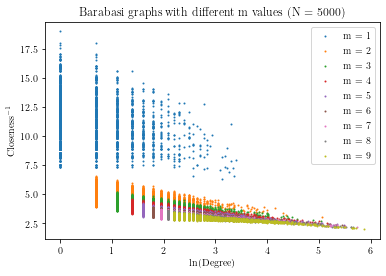

In [29]:
for i, m in enumerate(m_list):
    plt.scatter(d_array_processed[i], c_array_processed[i], label=f'm = {m}', s=1)

plt.title(f'Barabasi graphs with different m values (N = {N})')
plt.xlabel('ln(Degree)')
plt.ylabel('Closeness$^{-1}$')
plt.legend()
plt.show()

## Analysis
Compare different fits and see which are best

Fitted function

In [16]:
# b[0] * x ** 0 + b[1] * x ** 1 + b[2] * x ** 2 + ...
def polynomial (beta, x):
    return sum([b * x ** i for i,b in enumerate(beta)])

In [17]:
from scipy.odr import ODR, Model, Data, RealData

In [18]:
odr_outs = []


for d, c in zip(d_array_processed, c_array_processed):
    model = Model(polynomial)
    data = Data(d, c)
    # data = RealData(x_data, y_data, x_error, y_error)

    # length of beta0 gives polynomial
    odr = ODR(data, model, [0,0])
    odr.set_job(fit_type=0)
    output = odr.run()
    
    odr_outs.append(output)

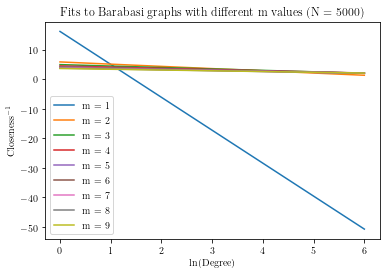

In [30]:
x = np.linspace(0,6, 10)
for i, m in enumerate(m_list):
    plt.plot(x, polynomial(odr_outs[i].beta, x), label=f'm = {m}')

plt.title(f'Fits to Barabasi graphs with different m values (N = {N})')
plt.xlabel('ln(Degree)')
plt.ylabel('Closeness$^{-1}$')
plt.legend()
plt.show()

# Summary of analysis

In [20]:
print(f"N = {N}")

z_list = []

for i, m in enumerate(m_list):
    gradient = odr_outs[i].beta[1]
    z = np.exp(-1 / gradient)
    z_sd = np.sqrt((((1 / gradient) * z) * odr_outs[i].sd_beta[1]) ** 2)
    z_exp = np.average(d_array[i] ** 2)/np.average(d_array[i]) - 1
    z_list.append((z,z_exp)) # also need errors 
    print(f"\nm = {m}")
    print(f"Gradiend: \t\t{gradient} ± {odr_outs[i].sd_beta[1]}")
    # print(f"Correction term: \t{odr_outs[i].beta[2]} ± {odr_outs[i].sd_beta[2]}")
    print(f"Expected z value: \t{z_exp}")
    print(f"Measured z value: \t{z} ± {z_sd}")

N = 5000

m = 1
Gradiend: 		-11.156336754195273 ± 0.5697504579023139
Expected z value: 	3.471094218843769
Measured z value: 	1.0937751550336015 ± 0.05585873832539397

m = 2
Gradiend: 		-0.752692578798005 ± 0.012114962275908352
Expected z value: 	8.859457837351206
Measured z value: 	3.77561638529413 ± 0.06077042788064363

m = 3
Gradiend: 		-0.4869421780542999 ± 0.007090662388671199
Expected z value: 	12.258303321328532
Measured z value: 	7.796164795608256 ± 0.1135247160412084

m = 4
Gradiend: 		-0.40177341270231576 ± 0.005362802790262789
Expected z value: 	16.58489244622311
Measured z value: 	12.048800292788751 ± 0.16082532538648045

m = 5
Gradiend: 		-0.3581797950474269 ± 0.004770286751759451
Expected z value: 	22.309425655393234
Measured z value: 	16.311884330324297 ± 0.21724387247157637

m = 6
Gradiend: 		-0.34912154286182484 ± 0.00421659923284485
Expected z value: 	25.31635478168051
Measured z value: 	17.5373339944993 ± 0.21181136076903948

m = 7
Gradiend: 		-0.31662727440278327 ± 0

## How does z change with m

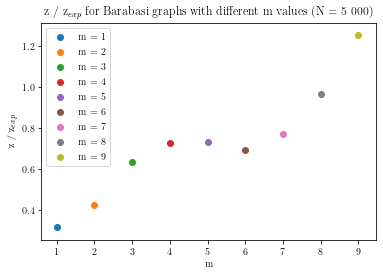

In [31]:
for i, z in enumerate(z_list):
    plt.scatter(m_list[i], z[0]/z[1], label=f'm = {m_list[i]}')

plt.title('z / z$_{exp}$ for Barabasi graphs with different m values (N = 5 000)')
plt.xlabel('m')
plt.ylabel('z / z$_{exp}$')
plt.legend()
plt.show()

Very curious behaviour from the plot. It seems to do the little plateau point every time a plot is run. 